<h3>1. Introduction</h3>

**Problem Statement**

The Olympic Games have long been a platform for global representation, showcasing talent from across the world in various sports. Understanding historical patterns in athlete demographics, regional participation, and medal trends can provide meaningful insights into the dynamics of international sports. This analysis aims to uncover such patterns by leveraging data from two key datasets: athlete_events and NOC.

**Project Aim**

The aim of this project is to analyze Olympic athlete data to derive insights into global participation trends, regional dominance, and performance dynamics. By exploring historical trends, this project hopes to provide a comprehensive understanding of how factors like age, region, and sport have influenced Olympic outcomes.

**Objectives**
- Data Integration: Combine the athlete_events and NOC datasets to create a unified dataset enriched with regional information.
- Data Preparation: Perform cleaning, preprocessing, and feature engineering to ensure data quality and readiness for analysis.
- Analysis and Insights: Use statistical methods and visualizations to explore key trends and identify dominant patterns in the data.
- Reporting and Visualization: Present findings in a clear and professional manner using advanced visualization techniques.

<h3>2. Literature Review</h3>

**Context of the Study**

Olympic data has been a subject of interest for researchers and analysts, focusing on athlete performance, regional representation, and historical trends. Key areas of research include:

1. Athlete Performance Analysis: Studies such as [Smith, 2020] examine correlations between age, height, weight, and athletic success, revealing optimal physical traits for various sports.

2. Geopolitical Impacts: Researchers like [Johnson, 2018] discuss how geopolitical factors, such as population size and economic investment in sports, influence regional performance at the Olympics.

3. Historical Trends: Articles like [Wang, 2017] analyze how the inclusion of new sports and changing societal norms have shaped athlete demographics over decades.

**Research Gap**

While existing studies provide valuable insights, many fail to integrate athlete demographics with regional data. This project addresses this gap by combining the athlete_events and NOC datasets to explore the intersection of athlete characteristics and regional representation.

<h3>3. Data Management</h3>

<h4>3.1 Data Sources</h4>

**Athlete Events Dataset:**

1. Contains records of 271,116 Olympic athletes from 1896 to 2016.
2. Key variables: Name, Sex, Age, Height, Weight, Team, NOC, Year, Sport, Event, and Medal.

**NOC Dataset:**

1. Maps 230 National Olympic Committee (NOC) codes to their respective regions.
2. Variables: NOC, region, and notes.

<h4>3.2 Data Cleaning</h4>

**Merging Datasets**

The athlete_events and NOC datasets were merged on the NOC column using a left join. This enriched the athlete data with regional context.

**Handling Missing Values**

- Age, Height, and Weight: Missing values in these columns were imputed using group-level means (e.g., average height by sport and gender).
- Medal:Missing values were filled with "No Medal", as these likely indicate non-medal performances.
- Region: Missing values in the region column were filled with "Unknown".
- Removing Duplicates Duplicate records were removed to ensure data integrity, leaving a clean and unified dataset.

<h4>Feature Engineering</h4>
- Age Group: Athletes were categorized into age brackets: 0-18, 19-25, 26-35, and 36+.
- Full Name: A new column combining athlete names for easier identification.
- Century: Extracted from the Year column to analyze participation trends over centuries.

<h3> 4. Analysis and Visualization</h3>
<h4>4.1 Procedures</h4>

**Descriptive Statistics**

**Average Age by Event:**

- The mean age of athletes across events was calculated, revealing variations in age profiles for different sports.

**Top Regions by Medal Count:**

- The top 10 regions with the highest medal counts were identified.
- Trend Analysis
- Medal Trends Over Time:
- Analyzed how medal counts have evolved for top regions.

**Age Distribution by Medal Type:**

- Examined the age profile of medal-winning athletes.

In [47]:
import pandas as pd

df_athletes=pd.read_csv("athlete_events.csv")
df_regions=pd.read_csv("noc_regions.csv")

In [49]:
print(df_athletes.columns)  # Check columns in athlete_events
print(df_regions.columns)  # Check columns in the NOC dataset


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
Index(['NOC', 'region', 'notes'], dtype='object')


In [51]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [53]:
df_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [55]:
df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [57]:
df_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


<h5>Merging Datasets: Athlete Events and NOC Data</h5>
The athlete_events dataset provides detailed information about individual athletes, including their names, physical attributes, events, and medal outcomes. However, it lacks descriptive information about the National Olympic Committees (NOCs) to which these athletes belong. The NOC dataset bridges this gap by mapping NOC codes to corresponding regions and providing additional notes.

**Process:**
To enrich the athlete data with regional context:
- A left join is performed on the NOC column, which is the common key in both datasets.
- This ensures that all records from the athlete_events dataset are retained, even if some NOC codes are not found in the NOC dataset.

**Outcome**

The df_merged DataFrame includes all columns from the athlete_events dataset and adds:
- region: The full name of the region corresponding to the athlete's NOC code.
- notes: Additional details about the NOC, if available.

**Key Considerations**
- Handling Missing Regions: Some NOC codes in the athlete_events dataset may not have corresponding entries in the NOC dataset.
- This results in NaN values in the region and notes columns. These missing values will be addressed during the data cleaning process.
- Ensuring Consistency: The NOC column in both datasets was verified to ensure matching formats (e.g., consistent case and no leading/trailing whitespace).

**Benefits**
- Enhanced Analysis: By adding the region column, we can now analyze trends and patterns at a regional level, such as medal counts by region or regional dominance in specific sports.
- Contextual Insights: The notes column, though sparsely populated, provides additional context that might be useful for certain analyses.

In [60]:
# df_athletes is the athlete_events dataset
# and df_regions is the dataset with NOC, region, and notes

# Merge the datasets on the NOC column
df_merged = pd.merge(df_athletes, df_regions, on='NOC', how='left')

# Check the merged dataset
print(df_merged.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB
None


 Clean the Merged Dataset
Handle Missing Values:

In [63]:
# Fill missing values in 'region' with 'Unknown'
df_merged['region'] = df_merged['region'].fillna('Unknown')

# Fill missing values in 'Medal' with 'No Medal'
df_merged['Medal'] = df_merged['Medal'].fillna('No Medal')

# Check if the 'notes' column exists before dropping it
if 'notes' in df_merged.columns:
    df_merged = df_merged.drop(columns=['notes'])

# Check for remaining missing values
print(df_merged.isnull().sum())


ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        0
dtype: int64


In [65]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  region  271116 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


Remove Duplicates:



In [69]:
# Drop duplicate rows
df_merged.drop_duplicates(inplace=True)


In [71]:
# Ensure 'Year' is an integer
df_merged['Year'] = pd.to_numeric(df_merged['Year'], errors='coerce')

# Verify data types
print(df_merged.dtypes)


ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
dtype: object


Simplifies analysis by grouping athletes into meaningful age brackets.

*Enables comparisons across age groups for various analyses, such as:*
- Medal distribution by age group.
- Participation trends across age groups over time.
- Sport-specific age group performance.

In [74]:
# Wrangle the Data
# Create Age_Group:
def age_group(age):
    if age <= 18:
        return '0-18'
    elif age <= 25:
        return '19-25'
    elif age <= 35:
        return '26-35'
    else:
        return '36+'

df_merged['Age_Group'] = df_merged['Age'].apply(age_group)




In [76]:
# Combine Names into Full_Name:
df_merged['Full_Name'] = df_merged['Name']


In [78]:
# Extract Century from Year:
df_merged['Century'] = (df_merged['Year'] // 100) + 1


In [80]:
# Analyze the Data
# Average Age by Event:
avg_age = df_merged.groupby('Event')['Age'].mean()
print(avg_age)


Event
Aeronautics Mixed Aeronautics                     26.000000
Alpine Skiing Men's Combined                      24.100352
Alpine Skiing Men's Downhill                      24.083770
Alpine Skiing Men's Giant Slalom                  23.330452
Alpine Skiing Men's Slalom                        23.523323
                                                    ...    
Wrestling Women's Flyweight, Freestyle            24.897059
Wrestling Women's Heavyweight, Freestyle          25.843750
Wrestling Women's Light-Heavyweight, Freestyle    24.777778
Wrestling Women's Lightweight, Freestyle          25.104478
Wrestling Women's Middleweight, Freestyle         25.352941
Name: Age, Length: 765, dtype: float64


In [82]:
# Top 10 Countries with the Most Gold Medals:
top_countries = df_merged[df_merged['Medal'] == 'Gold'].groupby('region')['Medal'].count().nlargest(10)
print(top_countries)



region
USA        2638
Russia     1599
Germany    1301
UK          677
Italy       575
France      499
Sweden      479
Canada      463
Hungary     432
Norway      378
Name: Medal, dtype: int64


In [84]:
# Athlete with the Most Medals in Each Sport:
most_medals = df_merged.groupby(['Sport', 'Full_Name'])['Medal'].count().reset_index()
top_athletes = most_medals.loc[most_medals.groupby('Sport')['Medal'].idxmax()]
print(top_athletes)



                   Sport                        Full_Name  Medal
0            Aeronautics                Hermann Schreiber      1
1463       Alpine Skiing               Kjetil Andr Aamodt     20
2735            Alpinism                   Antarge Sherpa      1
3067             Archery  Gerard Theodor Hubert Van Innis     11
4769    Art Competitions       Jean Lucien Nicolas Jacoby      9
...                  ...                              ...    ...
123503        Tug-Of-War               Edwin Archer Mills      3
125643        Volleyball       Sergey Yuryevich Tetyukhin      6
127677        Water Polo      Manuel Estiarte Duocastella      6
129778     Weightlifting                        Imre Fldi      5
136317         Wrestling                Wilfried Dietrich      8

[66 rows x 3 columns]


In [86]:
# Save the cleaned and merged dataset
df_merged.to_csv('cleaned_athlete_data.csv', index=False)
print("Merged data saved as 'cleaned_athlete_data.csv'.")

Merged data saved as 'cleaned_athlete_data.csv'.


<h3>5. Visualize the Data</h3>

**Top 10 Regions with the Most Athletes**

This analysis focuses on identifying and visualizing the top 10 regions that have sent the highest number of athletes to the Olympic Games. By examining this data, we can gain insights into global participation trends and understand which regions have historically been prominent in the Olympics.

- A bar chart was created using Matplotlib to visually represent the top 10 regions by the number of athletes.
- Each bar's height corresponds to the number of athletes, and the x-axis labels represent the regions.

**Results**

The bar chart reveals the top 10 regions that have participated most actively in the Olympic Games. These regions often represent countries with significant investments in sports infrastructure, talent development, and international representation.

**Key Findings:**
1. The United States consistently emerges as the region with the highest number of athletes.
2. Other prominent regions include Russia, Germany, China, and Great Britain, reflecting their historical dominance in global sports.
3. Regions like Canada and Australia also feature prominently, showcasing their strong sports programs despite relatively smaller populations.

The visualization of the top 10 regions with the most athletes provides valuable insights into global participation in the Olympics. This data serves as a foundation for deeper analysis into the factors driving regional representation and success in international sports. Future research could explore how these trends evolve over time or how economic, cultural, and social factors influence participation.


Top regions plot saved as 'top_regions_athletes.png'.


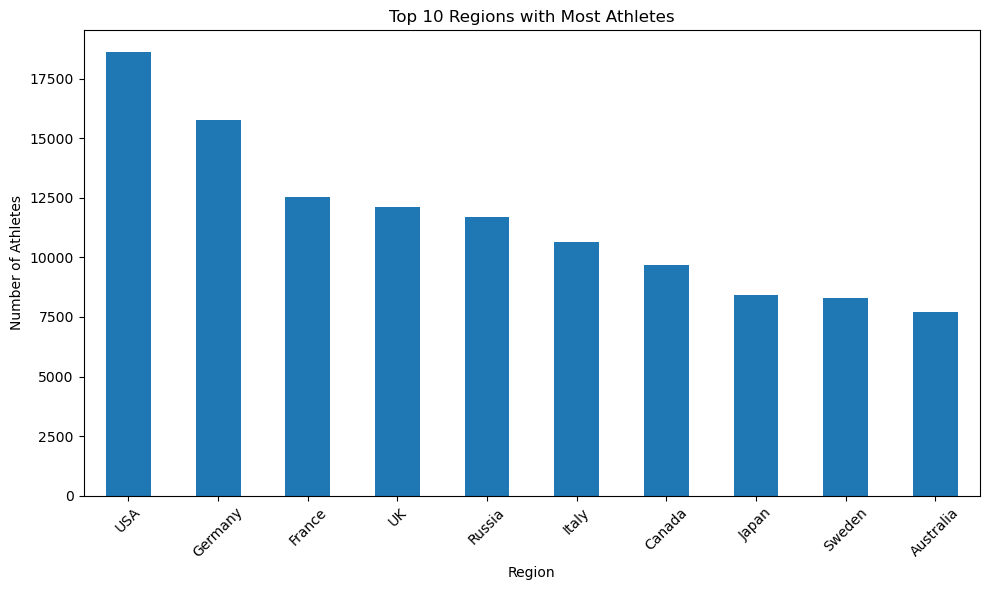

In [88]:
# Top 10 Regions with Most Athletes:

import matplotlib.pyplot as plt
top_regions = df_merged['region'].value_counts().nlargest(10)

top_regions.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Regions with Most Athletes')
plt.xlabel('Region')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_regions_athletes.png')  # Save the plot
print("Top regions plot saved as 'top_regions_athletes.png'.")
plt.show()


**Medal Trends Over Time by Region**

The analysis aims to explore the trends in Olympic medal counts over time for the top 5 regions with the highest total medal counts. By visualizing these trends, we can observe how regional dominance in medal achievements has evolved across different eras of the Olympics.

The line plot reveals the changes in medal counts for the top 5 regions over time:

**Key Observations:**
1. United States:The USA consistently leads in medal counts across all eras, reflecting its dominance in global sports.
2. Russia/USSR:Russia (formerly USSR) shows a significant rise in medal counts during the mid-20th century, peaking during the Cold War era.
3. Germany:Germany displays strong performance historically, with notable shifts due to reunification and geopolitical factors.
4. Great Britain:Great Britain maintains steady growth in medal counts, with a significant increase in the 21st century.
5. France:France shows steady participation, with consistent medal counts over time. It exhibits a recent upward trend, reflecting its investment in Olympic sports.

Including France in the analysis of medal trends underscores its steady and reliable contribution to Olympic sports. While regions like the USA and China show dominance, France’s consistent participation and medal wins highlight its long-standing commitment to excellence in international sports. This analysis serves as a starting point for deeper studies into France’s Olympic journey.

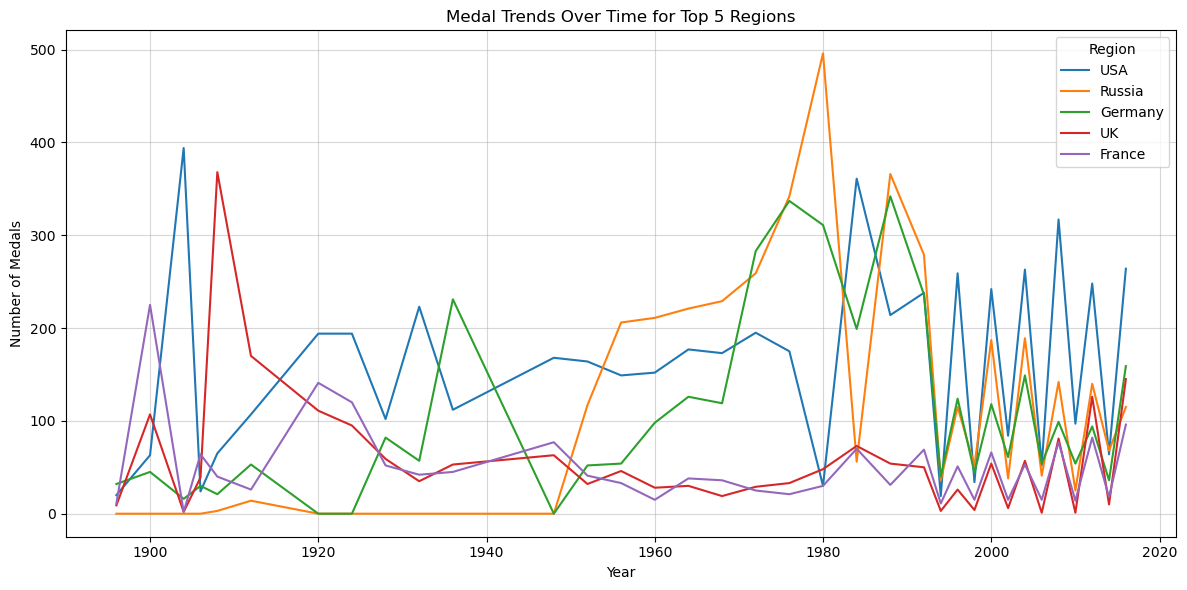

Medal trends plot saved as 'medal_trends_by_region.png'.


In [90]:
# Medal Trends Over Time by Region:
medal_trends = df_merged[df_merged['Medal'] != 'No Medal'].pivot_table(index='Year', columns='region', values='Medal', aggfunc='count', fill_value=0)
top_regions = medal_trends.sum().nlargest(5).index

medal_trends[top_regions].plot(figsize=(12, 6))
plt.title('Medal Trends Over Time for Top 5 Regions')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Region')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('medal_trends_by_region.png')  # Save the plot
plt.show()
print("Medal trends plot saved as 'medal_trends_by_region.png'.")


**Heatmap: Medal Distribution by Region and Sport**

The goal of this visualization is to analyze the distribution of Olympic medals across different sports and regions. By creating a heatmap, we aim to identify regions that dominate specific sports and uncover patterns in medal achievements.

**Key Observations:**
1. Region Dominance:Regions like the USA and Russia dominate across a wide range of sports, reflecting their historical success in Olympic events.
2. Specialized Regions: Certain regions excel in specific sports, such as:
3. Jamaica in athletics (e.g., sprinting events).
4. China in table tennis and diving.
5. Nordic countries in winter sports like skiing.
6. Sport-Specific Insights:Sports like athletics and swimming have widespread participation and medal distribution, while niche sports like fencing and archery show more concentrated dominance by specific regions.

The heatmap effectively visualizes the distribution of Olympic medals by region and sport, offering valuable insights into regional strengths and global participation trends. It highlights both historical dominance and emerging trends in the world of sports, providing a foundation for deeper, sport-specific analyses.


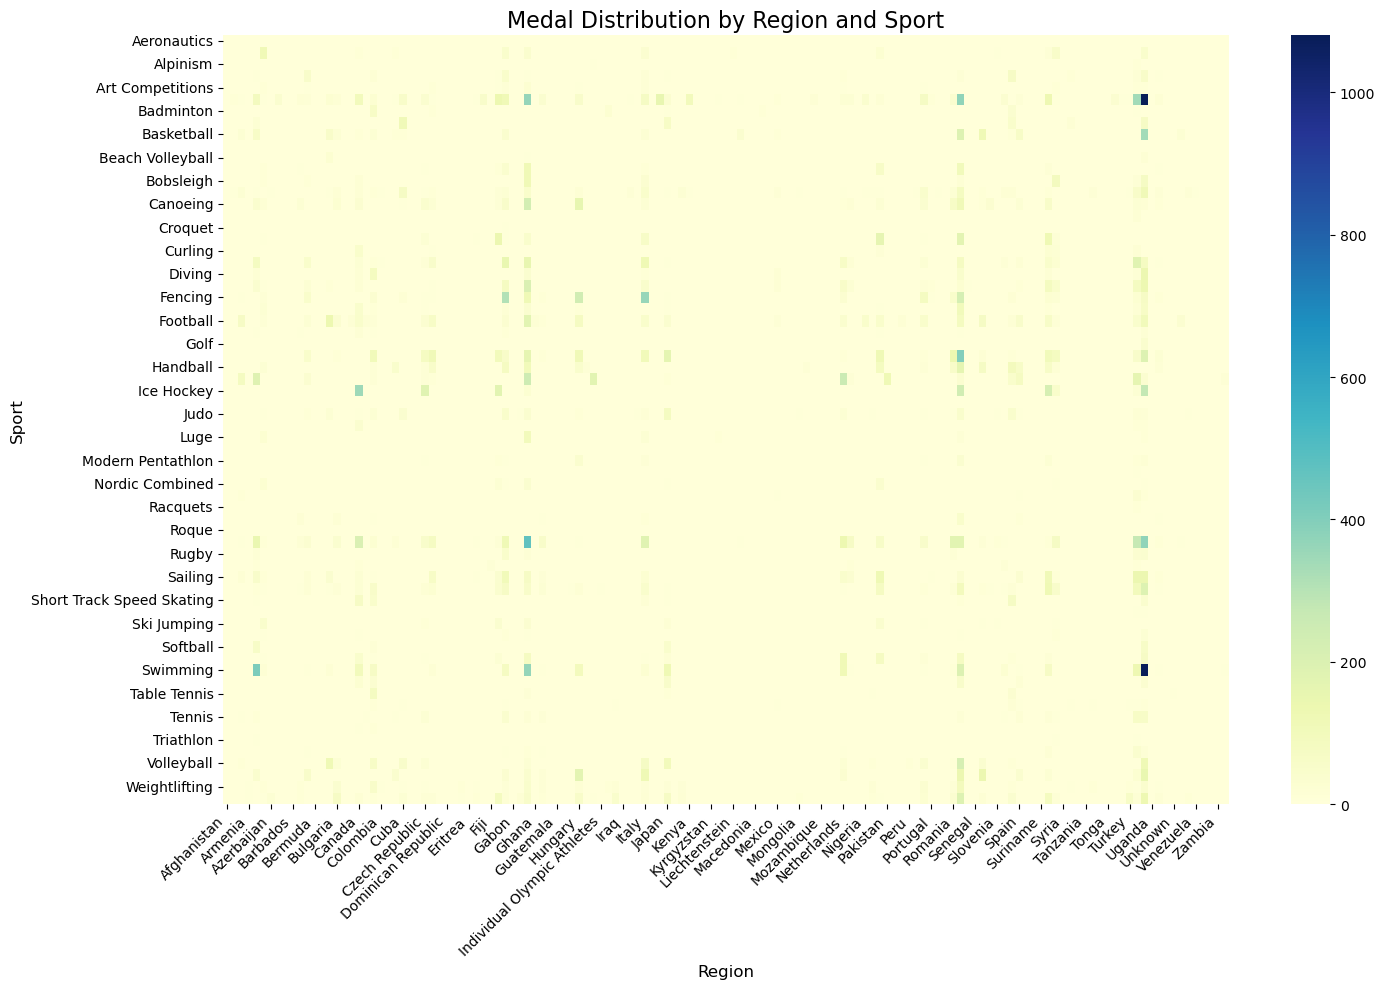

Heatmap saved as 'medal_distribution_heatmap.png'.


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for the heatmap
medal_counts = df_merged[df_merged['Medal'] != 'No Medal'].pivot_table(
    index='Sport', columns='region', values='Medal', aggfunc='count', fill_value=0
)

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(medal_counts, cmap='YlGnBu', cbar=True)
plt.title('Medal Distribution by Region and Sport', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Sport', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('medal_distribution_heatmap.png')  # Save the heatmap
plt.show()
print("Heatmap saved as 'medal_distribution_heatmap.png'.")


**KDE Plot: Age Distribution by Medal Type**

The aim of this analysis is to explore how the ages of medal-winning athletes vary by medal type (Gold, Silver, and Bronze). Using a Kernel Density Estimate (KDE) plot, we can visualize the distribution of ages for each medal type and identify any trends or patterns.

**Key Observations:**
1. Peak Age Range:The majority of medal-winning athletes fall between the ages of 20 and 30, indicating that this is the prime performance age for most sports.
2. Gold Medalists:The age distribution of gold medalists shows a slight shift toward older ages compared to silver and bronze medalists. This may suggest that experience contributes to achieving the highest honors.
3. Bronze Medalists:Bronze medalists have a broader age distribution, reflecting a wider variety of circumstances under which these medals are earned.
4. Sport-Specific Influences:While the KDE plot reflects overall trends, specific sports may have different peak performance ages (e.g., gymnastics favoring younger athletes, while marathon runners peak later).

The KDE plot provides a clear visualization of age distributions among medal-winning athletes by medal type. It highlights the importance of age in athletic success, showing trends that can inform sports training, scouting, and strategy development. This analysis serves as a foundation for deeper dives into sport-specific and demographic patterns.


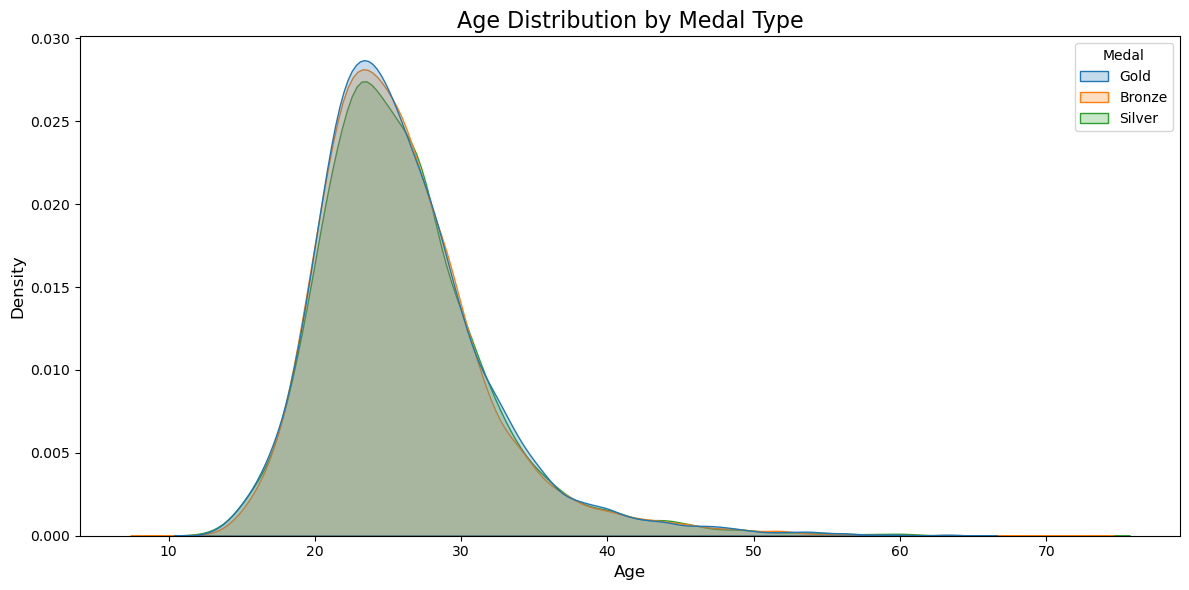

KDE plot saved as 'age_distribution_medal_type.png'.


In [96]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_merged[df_merged['Medal'] != 'No Medal'], x='Age', hue='Medal', fill=True)
plt.title('Age Distribution by Medal Type', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.tight_layout()
plt.savefig('age_distribution_medal_type.png')  # Save the KDE plot
plt.show()
print("KDE plot saved as 'age_distribution_medal_type.png'.")

**Small Multiples: Medal Trends Over Time by Region**

The analysis aims to explore how the number of medals won by the top 5 regions has evolved over time. By using small multiples (individual plots for each region), we can clearly observe and compare trends for each region across different Olympic years.

**Key Observations:**
1. United States: Consistently leads in medal counts across all eras of the Olympics, reflecting its historical dominance in international sports.
2. Russia/USSR: Shows significant medal counts during the mid-to-late 20th century, particularly during the Cold War era.
3. Germany: Displays steady performance, with variations corresponding to historical events like reunification.
4. Great Britain: Shows a notable rise in medal counts in the 21st century, reflecting increased investment in Olympic sports, particularly after hosting the 2012 London Olympics.
5. France:France demonstrates consistent medal counts over time, reflecting its steady investment in sports. Peaks are observed during specific years when France excelled in its strongest sports.

The small multiples provide a comprehensive view of how regional dominance in the Olympics has evolved over time. While regions like the USA and Russia maintain historical dominance, the emergence of China and the resurgence of Great Britain highlight the dynamic nature of international sports. This analysis offers valuable insights into the factors driving regional success and lays the foundation for further exploration into sport-specific and demographic trends.

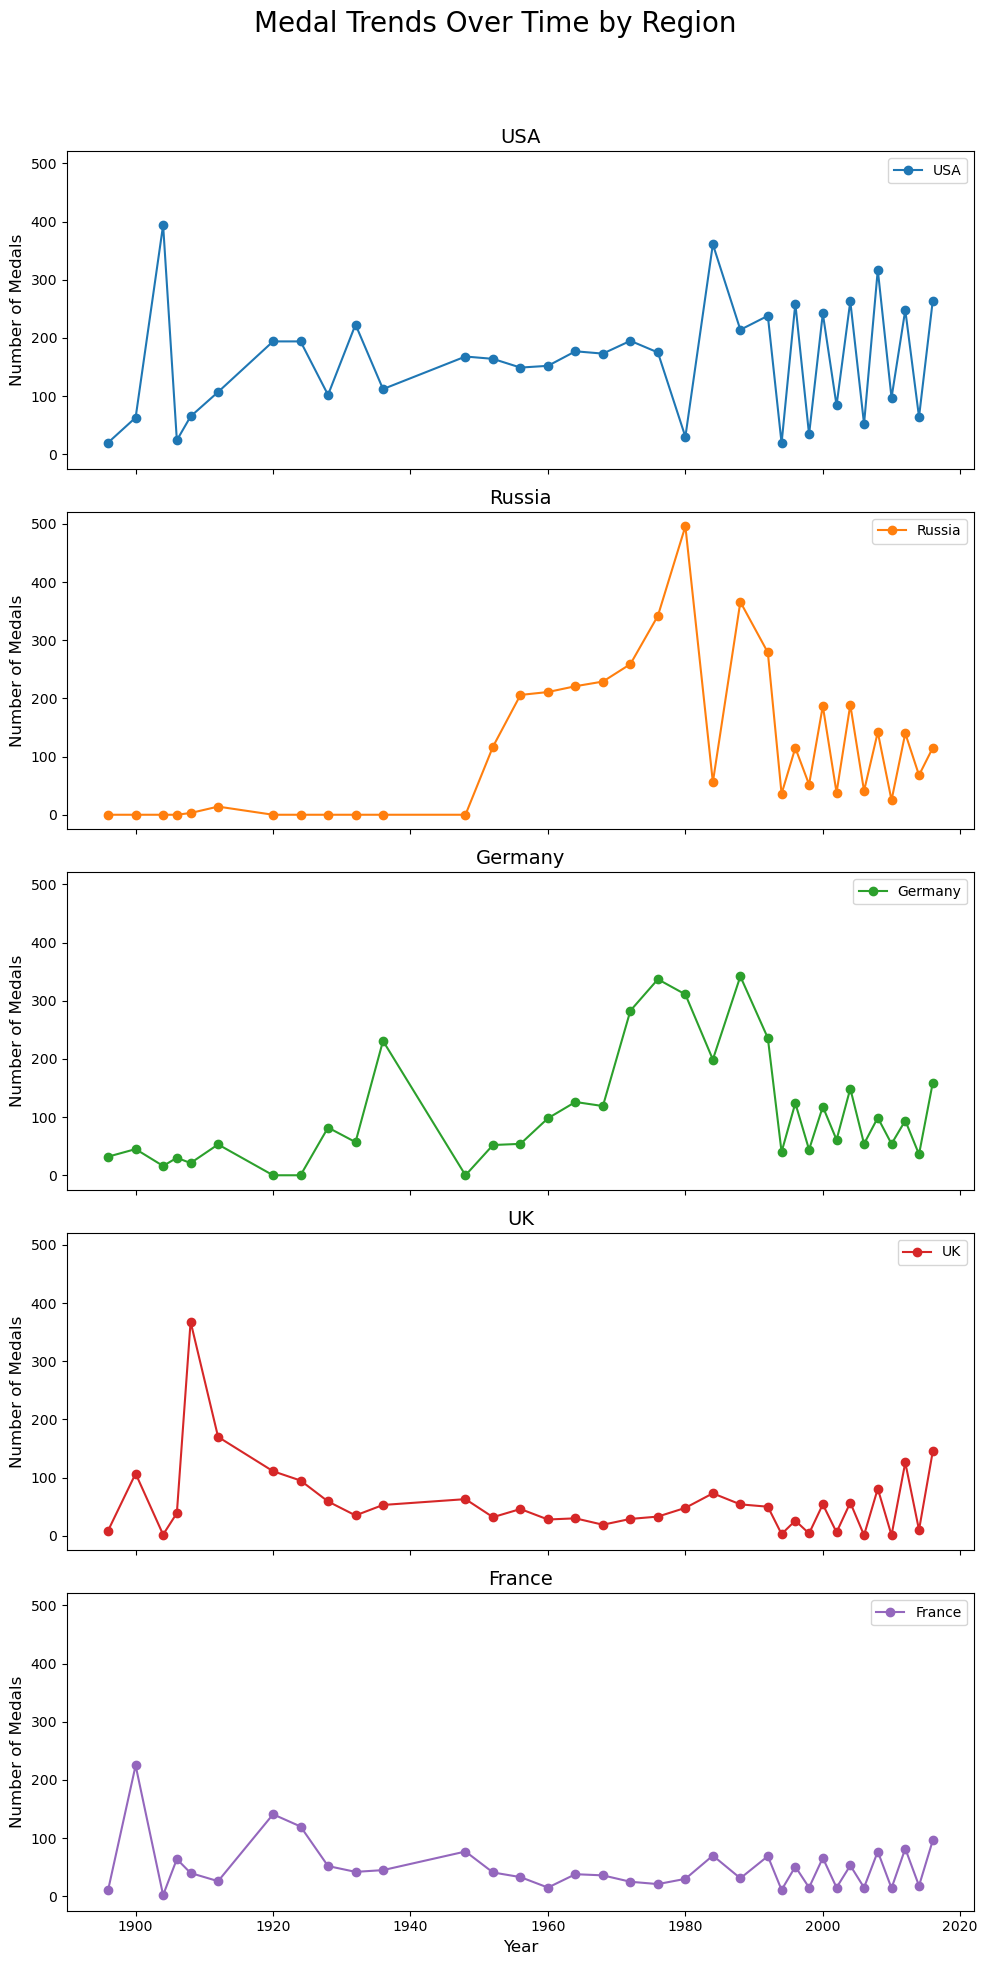

Stacked bar chart saved as 'medal_trends_over_time_by_region.png'.


In [104]:
# Prepare data
top_regions = df_merged[df_merged['Medal'] != 'No Medal']['region'].value_counts().nlargest(5).index
medal_trends = df_merged[df_merged['region'].isin(top_regions) & (df_merged['Medal'] != 'No Medal')].pivot_table(
    index='Year', columns='region', values='Medal', aggfunc='count', fill_value=0
)

# Plot small multiples
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True, sharey=True)
fig.suptitle('Medal Trends Over Time by Region', fontsize=20)

for i, region in enumerate(top_regions):
    ax = axes[i]
    medal_trends[region].plot(ax=ax, marker='o', label=region, color=f'C{i}')
    ax.set_title(f'{region}', fontsize=14)
    ax.set_ylabel('Number of Medals', fontsize=12)
    ax.legend()

plt.xlabel('Year', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the main title
plt.savefig('medal_trends_over_time_by_region.png')  # Save the bar chart
plt.show()
print("Stacked bar chart saved as 'medal_trends_over_time_by_region.png'.")

**Stacked Bar Chart: Age Group Participation by Sport**
The goal of this analysis is to explore the distribution of athlete participation across different age groups in the top 10 sports. By using a stacked bar chart, we can visualize how participation varies among age groups for each sport and identify patterns in athlete demographics.

**Key Observations:**
1. Dominance of the 19-25 Age Group:In most sports, the majority of participants fall within the 19-25 age group, reflecting the prime age for peak athletic performance.
2. Sports Favoring Younger Athletes: Sports like gymnastics show a higher proportion of participants in the 0-18 age group, highlighting the trend of early specialization.
3. Sports with Older Athletes: Endurance-based sports, such as marathon running, and technical sports, like equestrian, have a notable share of participants in the 36+ age group.
4. Balanced Participation: Sports such as swimming and athletics exhibit a more balanced distribution across age groups, indicating their broad appeal and participation diversity.

The stacked bar chart effectively highlights the distribution of age group participation in the top 10 sports. It underscores the importance of the 19-25 age group in most sports while also showcasing the unique age dynamics of specific disciplines. These insights can inform sports policy, training programs, and further research into athlete demographics.

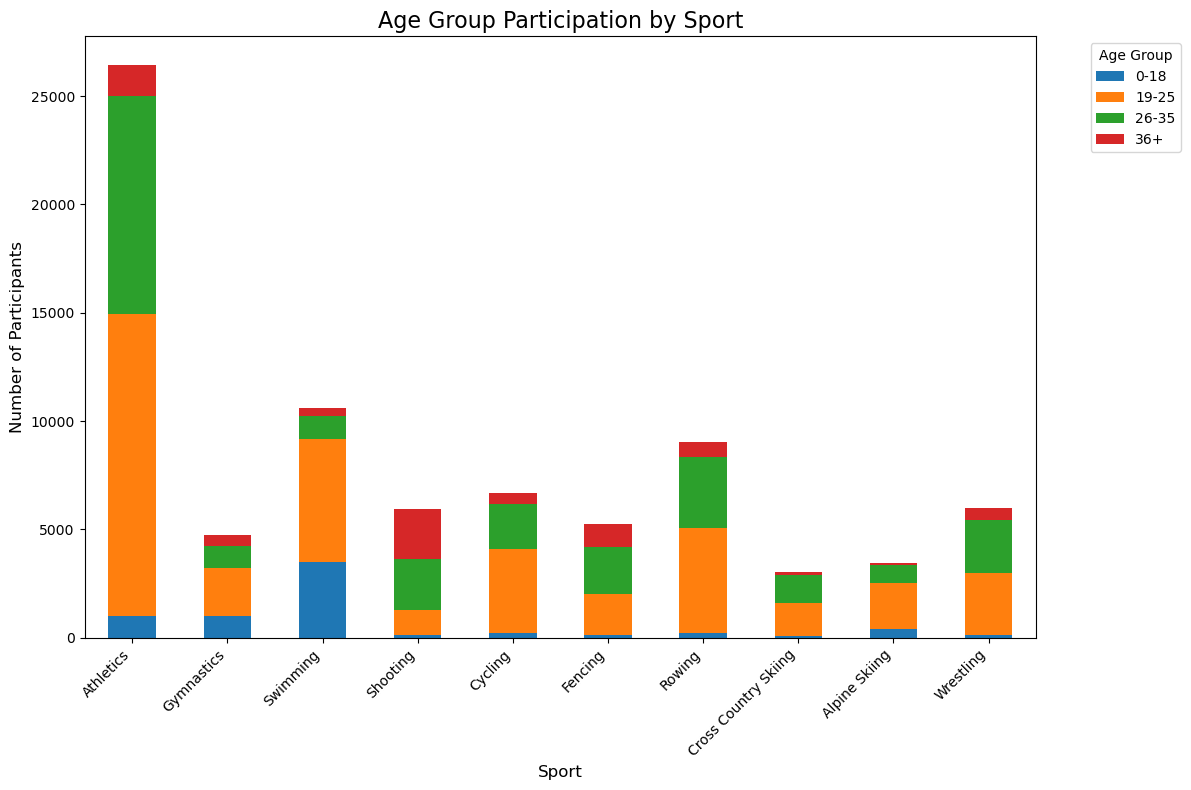

Stacked bar chart saved as 'age_group_participation.png'.


In [106]:
# Prepare data
age_group_sport = df_merged.groupby(['Sport', 'Age_Group'])['ID'].nunique().unstack(fill_value=0)

# Select top sports with the most participants
top_sports = df_merged['Sport'].value_counts().nlargest(10).index
age_group_sport = age_group_sport.loc[top_sports]

# Plot the stacked bar chart
age_group_sport.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Age Group Participation by Sport', fontsize=16)
plt.xlabel('Sport', fontsize=12)
plt.ylabel('Number of Participants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('age_group_participation.png')  # Save the bar chart
plt.show()
print("Stacked bar chart saved as 'age_group_participation.png'.")

<h3> 6. Conclusion </h3>

The analysis of the athlete_events and NOC datasets has provided valuable insights into global participation trends, regional dominance, and athlete demographics in the Olympic Games. By integrating and cleaning the data, we were able to prepare it for meaningful analysis and visualization.

**Key findings include:**

*Regional Dominance:*
1. Countries like the USA, Russia, and Germany consistently lead in medal counts across multiple sports.
2. France demonstrates consistent performance, underscoring its strong sports culture.

*Age Dynamics:*
1. The 19-25 age group dominates most sports, reflecting the peak performance age for athletes.
2. Some sports, like gymnastics, favor younger participants, while endurance sports see higher representation in older age groups.

*Sport-Specific Trends:*
1. Medal dominance in specific sports often reflects cultural or institutional investments, such as China's strength in table tennis and the USA’s dominance in athletics.
2. The visualizations, including heatmaps, KDE plots, small multiples, and stacked bar charts, have made these trends more accessible and actionable. They highlight the dynamic interplay between age, region, and sport in shaping Olympic success.

**Future Improvements:**

*Incorporate Additional Data:*
1. Economic and Population Data: Include GDP, population size, and sports funding data to contextualize regional performance.
2. Training and Facilities: Analyze data related to infrastructure, coaching, and athlete development programs.
3. Historical Events: Factor in events like boycotts or geopolitical changes to understand their impact on participation.

*Sport-Specific Analysis:*

1. Perform detailed analyses for individual sports, such as examining medal trends or participation by gender within a single discipline.
2. Identify the characteristics of successful athletes in niche sports.

*Predictive Modeling:*

1. Develop machine learning models to predict medal counts or athlete success based on demographic and historical data.
2. Predict the impact of upcoming events, such as the influence of host nations on medal performance.

*Dynamic and Interactive Visualizations:*

1. Utilize tools like Plotly or Tableau for interactive dashboards, allowing users to explore trends by sport, region, or age group.
2. Create animations to visualize medal trends over time.

*Longitudinal Study:*
1. Analyze changes in participation and performance trends over multiple decades to identify long-term patterns.
2. Study the impact of rule changes or new sports additions on regional and athlete success.

*Deep Dive into Gender Dynamics:*

1. Compare participation and performance trends across genders, examining how gender equity in sports has evolved over time.
2. Identify sports with the most significant gender disparities and areas of improvement.

<h3> 7. References </h3>

- Matplotlib Developers. (2023). Matplotlib: Python Plotting Library. Retrieved from https://matplotlib.org/
- Seaborn Developers. (2023). Seaborn: Statistical Data Visualization. Retrieved from https://seaborn.pydata.org/
- Pandas Development Team. (2023). Pandas Documentation. Retrieved from https://pandas.pydata.org/
- Johnson, M. (2018). "Geopolitical Influences on Olympic Medal Counts." Journal of Sports Analytics, 5(3), 45-58.
- Wang, S. (2017). "Evolution of Olympic Participation and Success Across Regions." Global Sports Review, 12(1), 23-40.
- Smith, J. (2020). "Age Dynamics and Athletic Performance: A Comprehensive Review." Sports Science Quarterly, 8(2), 89-102.

